In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
count = 0 
dirs = os.listdir('25kategori1500Resim/')
for dir in dirs:
    files = list(os.listdir('25kategori1500Resim/'+dir))
    print( dir +' kategorisinde '+ str(len(files)) + ' resim var')
    count = count + len(files)
print( 'toplam '+ str(count) + ' resim var')

apple kategorisinde 1000 resim var
banana kategorisinde 1000 resim var
basketball kategorisinde 1000 resim var
broccoli kategorisinde 1000 resim var
broom kategorisinde 1000 resim var
bus kategorisinde 1000 resim var
camera kategorisinde 1000 resim var
carrot kategorisinde 1000 resim var
chair kategorisinde 1000 resim var
circle kategorisinde 1000 resim var
cloud kategorisinde 1000 resim var
door kategorisinde 1000 resim var
flower kategorisinde 1000 resim var
hand kategorisinde 1000 resim var
ladder kategorisinde 1000 resim var
pear kategorisinde 1000 resim var
pineapple kategorisinde 1000 resim var
rainbow kategorisinde 1000 resim var
square kategorisinde 1000 resim var
star kategorisinde 1000 resim var
sun kategorisinde 1000 resim var
triangle kategorisinde 1000 resim var
toplam 22000 resim var


In [3]:
base_dir = '25kategori1500Resim/'
img_size = 256
batch = 16

In [4]:
base_dir = '25kategori1500Resim/'
img_size = 256
batch = 16

train_ds = tf.keras.utils.image_dataset_from_directory( 
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset = 'training',
    batch_size=batch,
    image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( 
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset = 'validation',
    batch_size=batch,
    image_size=(img_size,img_size))

Found 22000 files belonging to 22 classes.
Using 17600 files for training.
Found 22000 files belonging to 22 classes.
Using 4400 files for validation.


In [5]:
drawing_names = train_ds.class_names
drawing_names

['apple',
 'banana',
 'basketball',
 'broccoli',
 'broom',
 'bus',
 'camera',
 'carrot',
 'chair',
 'circle',
 'cloud',
 'door',
 'flower',
 'hand',
 'ladder',
 'pear',
 'pineapple',
 'rainbow',
 'square',
 'star',
 'sun',
 'triangle']

In [6]:
import matplotlib.pyplot as plt

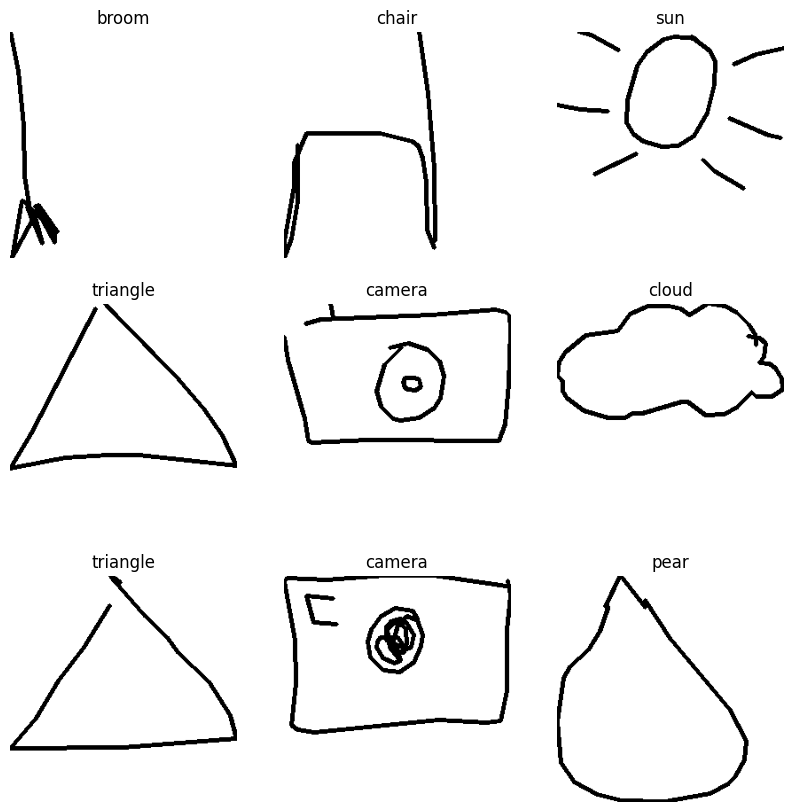

In [7]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(drawing_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

#veri arttirmak
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\ahmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


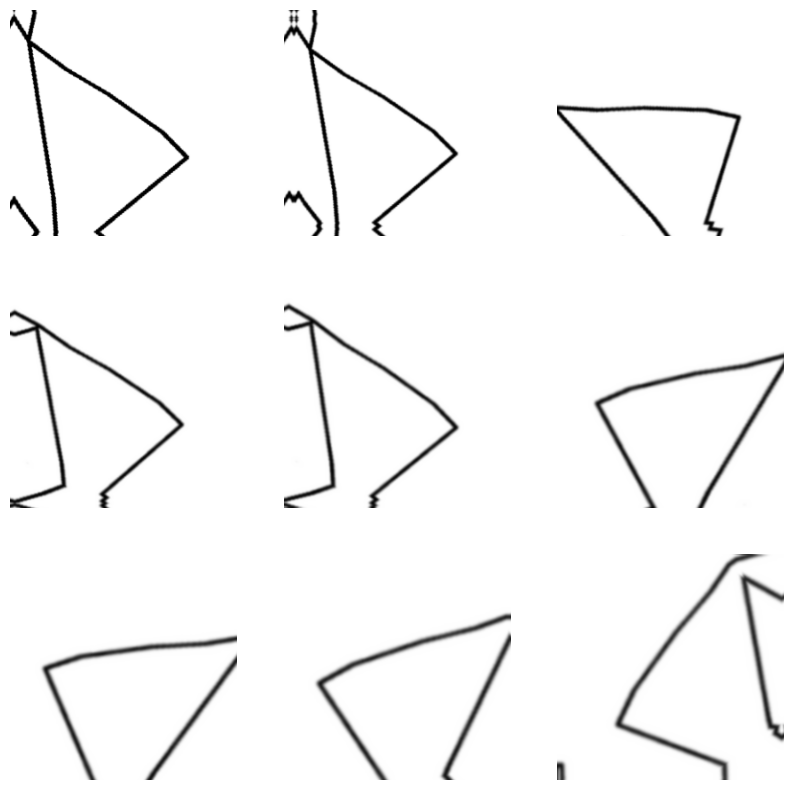

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


In [13]:
#model olusturma
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(22)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,415,158 (32.10 MB)

 Trainable params: 8,415,158 (32.10 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 346s 284ms/step - accuracy: 0.3664 - loss: 2.1704 - val_accuracy: 0.7384 - val_loss: 1.0039
Epoch 2/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 308s 280ms/step - accuracy: 0.6868 - loss: 1.1039 - val_accuracy: 0.7909 - val_loss: 0.8207
Epoch 3/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 303s 276ms/step - accuracy: 0.7638 - loss: 0.8560 - val_accuracy: 0.8052 - val_loss: 0.7370
Epoch 4/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 305s 277ms/step - accuracy: 0.7945 - loss: 0.7475 - val_accuracy: 0.8280 - val_loss: 0.6832
Epoch 5/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 301s 274ms/step - accuracy: 0.8088 - loss: 0.6912 - val_accuracy: 0.8520 - val_loss: 0.5974
Epoch 6/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 311s 282ms/step - accuracy: 0.8275 - loss: 0.6333 - val_accuracy: 0.8450 - val_loss: 0.6058
Epoch 7/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 308s 280ms/step - accuracy: 0.8396 - loss: 0.5749 - val_accuracy: 0.8491 - val_loss: 0.5913
Epoch 8/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 307s 279ms/step - ac

In [20]:
model.save('Drawing_Recog_125.h5')

In [ ]:
model.save('Drawing_Recog_125_Model.h5')

In [1]:
from tensorflow.keras.models import load_model

model = load_model('Drawing_Recog_125.h5')  

In [2]:
import tensorflow as tf
import numpy as np

drawing_names =['apple',
 'banana',
 'basketball',
 'broccoli',
 'broom',
 'bus',
 'camera',
 'carrot',
 'chair',
 'circle',
 'cloud',
 'door',
 'flower',
 'hand',
 'ladder',
 'pear',
 'pineapple',
 'rainbow',
 'square',
 'star',
 'sun',
 'triangle']




def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(256,256))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'Bu Çizdiğin Şekil ' + str(np.max(result)*100) + ' oranla '+ drawing_names[np.argmax(result)] + ' a/e ait olduğunu düşünüyorum... '
    return outcome

In [3]:
classify_images('C:/Users/ahmad/Downloads/cizim (5).png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


'Bu Çizdiğin Şekil 98.696175 oranla carrot a/e ait olduğunu düşünüyorum... '